Problem 1

In [1]:
# Sim constants

Years = 20
Steps = Years * 365

# Measles properties
beta = 0.01
gamma = 0.1
alpha = 0.005



Subproblem b:

In [2]:
# Make markov chain vector

set.seed(1)

run_20_years <- function(Steps) {

chain = integer(Steps)

    # Simulate over 20 years
    for (i in 2:length(chain)) {
        # Generate random variable
        s = runif(1,0,1)
    
        # If in state 0
        if(chain[i-1] == 0) {
            # S -> I with prob beta, else stay S
            if(s < beta){
                chain[i] = 1
            } else {
                chain[i] = 0
            }
        }
    
        # If in state 1
        if(chain[i-1] == 1) {
            # I -> R with prob gamma, else stay I
            if(s < gamma){
                chain[i] = 2
            } else {
                chain[i] = 1
            }
        }
        
        # If in state 2
        if(chain[i-1] == 2) {
            # R -> S with prob alpha, else stay R
            if(s < alpha){
                chain[i] = 0
            } else {
                chain[i] = 2
            }
        }
    }
    return(chain)
}

chain = run_20_years(Steps)

# Count number of days in states
days_of_state_0 <- sum(chain == 0)
days_of_state_1 <- sum(chain == 1)
days_of_state_2 <- sum(chain == 2)

print("Days in state 0: ")
print(days_of_state_0)
print("Days in state 1: ")
print(days_of_state_1)
print("Days in state 2: ")
print(days_of_state_2)

print("total")
print(days_of_state_0 + days_of_state_1 + days_of_state_2)

[1] "Days in state 0: "
[1] 2759
[1] "Days in state 1: "
[1] 336
[1] "Days in state 2: "
[1] 4205
[1] "total"
[1] 7300


In [3]:
# Compute mean days spent in each state from the last 10 years
find_mean_days <- function(chain) {

mean_time_0 = sum(chain[3651:Steps] == 0) / 10
mean_time_1 = sum(chain[3651:Steps] == 1) / 10
mean_time_2 = sum(chain[3651:Steps] == 2) / 10
print("mean days used in state S: ")
print(mean_time_0)
print("mean days used in state I: ")
print(mean_time_1)
print("mean days used in state R: ")
print(mean_time_2)
    # return a simple numeric vector (S, I, R)
    return(c(mean_time_0, mean_time_1, mean_time_2))
}


In [4]:
# Simulate 30 iterations and compute CI
set.seed(1)
# Generate 30 
estimates <- matrix(NA_real_, nrow = 30, ncol = 3)
colnames(estimates) <- c("S","I","R")

for(i in 1:30) {
    chain_i <- run_20_years(Steps)
    estimates[i, ] <- find_mean_days(chain_i)
}

# Approx 95% CIs using normal approx: mean ± 1.96 * sd/sqrt(30)
S_mean <- mean(estimates[, "S"]); S_se <- sd(estimates[, "S"]) / sqrt(30)
I_mean <- mean(estimates[, "I"]); I_se <- sd(estimates[, "I"]) / sqrt(30)
R_mean <- mean(estimates[, "R"]); R_se <- sd(estimates[, "R"]) / sqrt(30)

S_CI <- c(S_mean - 1.96*S_se, S_mean + 1.96*S_se)
I_CI <- c(I_mean - 1.96*I_se, I_mean + 1.96*I_se)
R_CI <- c(R_mean - 1.96*R_se, R_mean + 1.96*R_se)

print("Approx 95% CI for mean days/year (last 10 years):")
print(paste0("S: mean=", round(S_mean,2), ", CI=[", round(S_CI[1],2), ", ", round(S_CI[2],2), "]"))
print(paste0("I: mean=", round(I_mean,2), ", CI=[", round(I_CI[1],2), ", ", round(I_CI[2],2), "]"))
print(paste0("R: mean=", round(R_mean,2), ", CI=[", round(R_CI[1],2), ", ", round(R_CI[2],2), "]"))

[1] "mean days used in state S: "
[1] 131.1
[1] "mean days used in state I: "
[1] 18.6
[1] "mean days used in state R: "
[1] 215.3
[1] "mean days used in state S: "
[1] 98.6
[1] "mean days used in state I: "
[1] 9.1
[1] "mean days used in state R: "
[1] 257.3
[1] "mean days used in state S: "
[1] 117.7
[1] "mean days used in state I: "
[1] 12.5
[1] "mean days used in state R: "
[1] 234.8
[1] "mean days used in state S: "
[1] 158.8
[1] "mean days used in state I: "
[1] 8.4
[1] "mean days used in state R: "
[1] 197.8
[1] "mean days used in state S: "
[1] 137
[1] "mean days used in state I: "
[1] 15.1
[1] "mean days used in state R: "
[1] 212.9
[1] "mean days used in state S: "
[1] 124.5
[1] "mean days used in state I: "
[1] 12.1
[1] "mean days used in state R: "
[1] 228.4
[1] "mean days used in state S: "
[1] 140.6
[1] "mean days used in state I: "
[1] 11.4
[1] "mean days used in state R: "
[1] 213
[1] "mean days used in state S: "
[1] 133.1
[1] "mean days used in state I: "
[1] 10.8
[1]

## Subproblem e

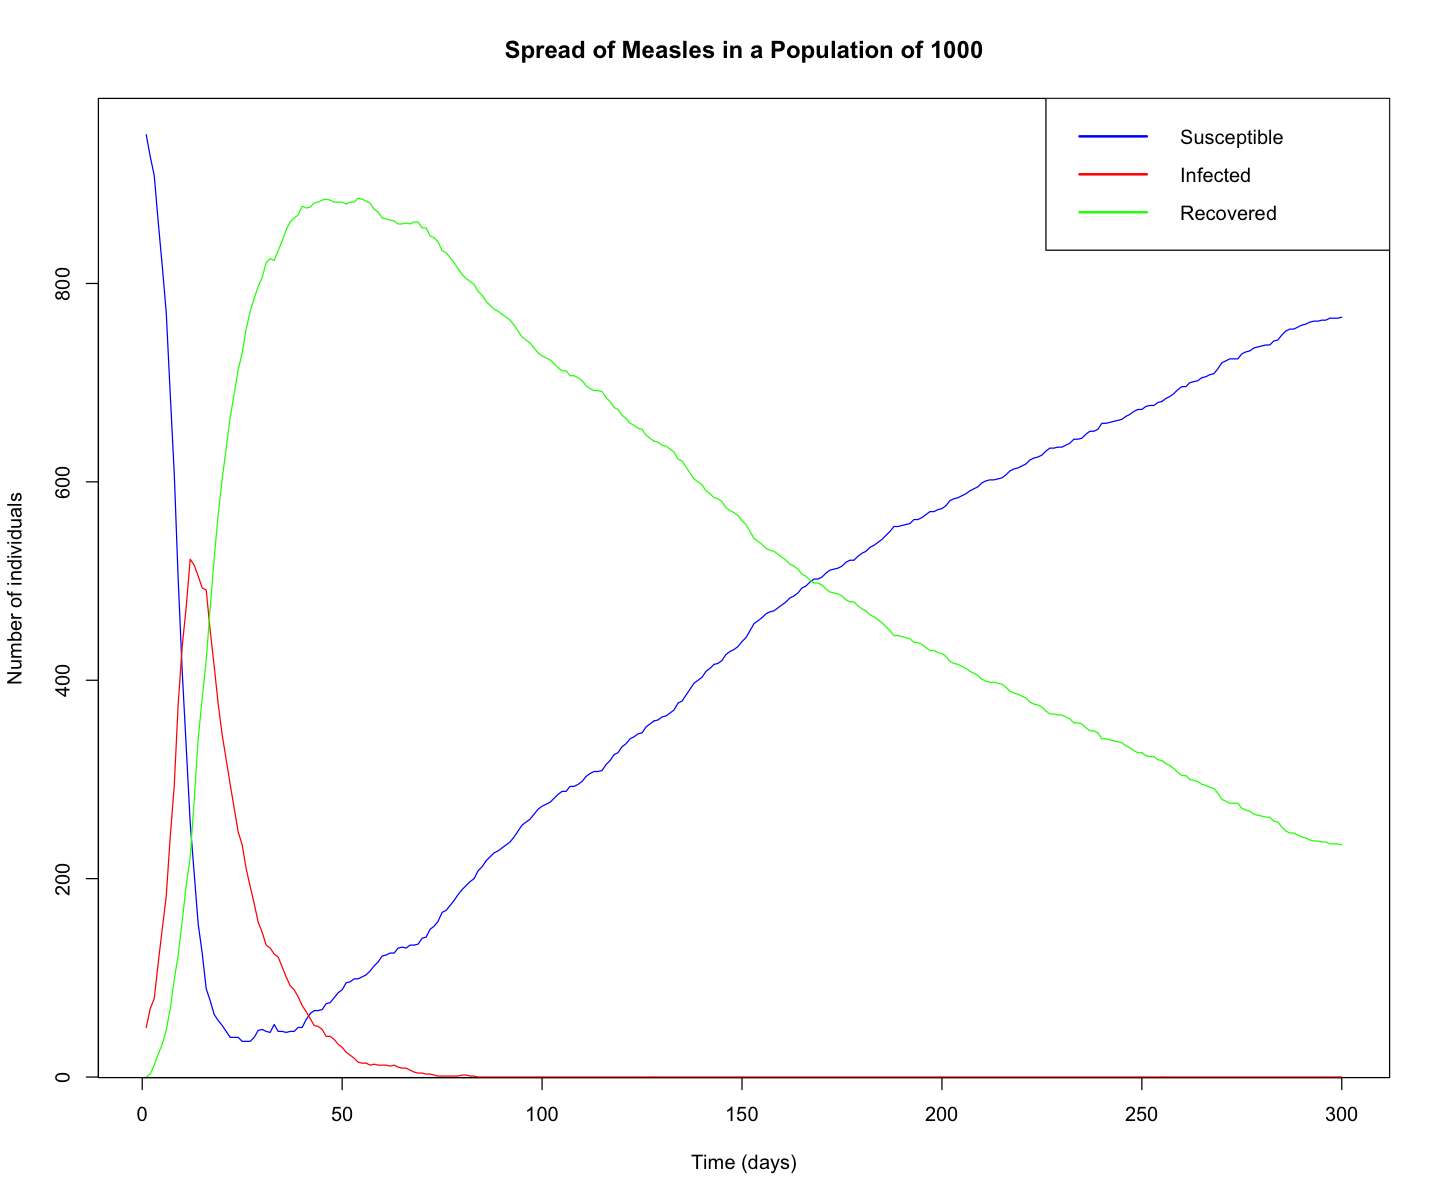

In [5]:
N <- 1000
steps <- 300
Y0 <- c(950, 50, 0)

beta_n <- function(infected, N) 0.5 * infected / N
    


spread_of_measles <- function(Y0, n){
    S <- integer(n); I <- integer(n); R <- integer(n)
    S[1] <- Y0[1]; I[1] <- Y0[2]; R[1] <- Y0[3]

    for (i in 2:n){
        Sprev <- S[i-1]; Iprev <- I[i-1]; Rprev <- R[i-1]
        beta <- beta_n(Iprev, N)

        Inew <- rbinom(n = 1, p = beta, size = Sprev)
        Istay <- rbinom(n = 1, p = 1 - gamma, size = Iprev)
        Rstay <- rbinom(n = 1, p = 1 - alpha, size = Rprev)

        S[i] <- Sprev - Inew + (Rprev - Rstay)
        I[i] <- Inew + Istay
        R[i] <- Rstay + (Iprev - Istay)
    }

    return (list(S, I, R))
}

measle_spread <- spread_of_measles(Y0, steps)


par(bg="white")
options(repr.plot.width = 12, repr.plot.height = 10)
plot(1:steps, measle_spread[[1]], type='l', col='blue', xlab='Time (days)', ylab='Number of individuals', main='Spread of Measles in a Population of 1000')
lines(1:steps, measle_spread[[2]], type='l', col='red')
lines(1:steps, measle_spread[[3]], type='l', col='green')
legend("topright", legend=c("Susceptible", "Infected", "Recovered"), col=c("blue", "red", "green"), lty=1, lwd=2)




# Problem 2

### Subproblem 2a

In [2]:
set.seed(123)

lambda <- 1.5     # claims per day
t <- 59           # days
mu <- lambda * t  # mean of Poisson distribution

# Exact probability
p_exact <- ppois(100, lambda = mu, lower.tail = FALSE)
p_exact

# Monte Carlo simulation
n_sims <- 1000
X_vals <- rpois(n_sims, mu)

# Estimate probability
p_hat <- mean(X_vals > 100)

# Standard error of estimate
se_hat <- sqrt(p_hat * (1 - p_hat) / n_sims)

cat("Exact probability:", round(p_exact, 5), "\n")
cat("Monte Carlo estimate:", round(p_hat, 5), "\n")
cat("Monte Carlo SE:", round(se_hat, 5), "\n")

[1] 0.1028222

Exact probability: 0.10282 
Monte Carlo estimate: 0.085 
Monte Carlo SE: 0.00882 


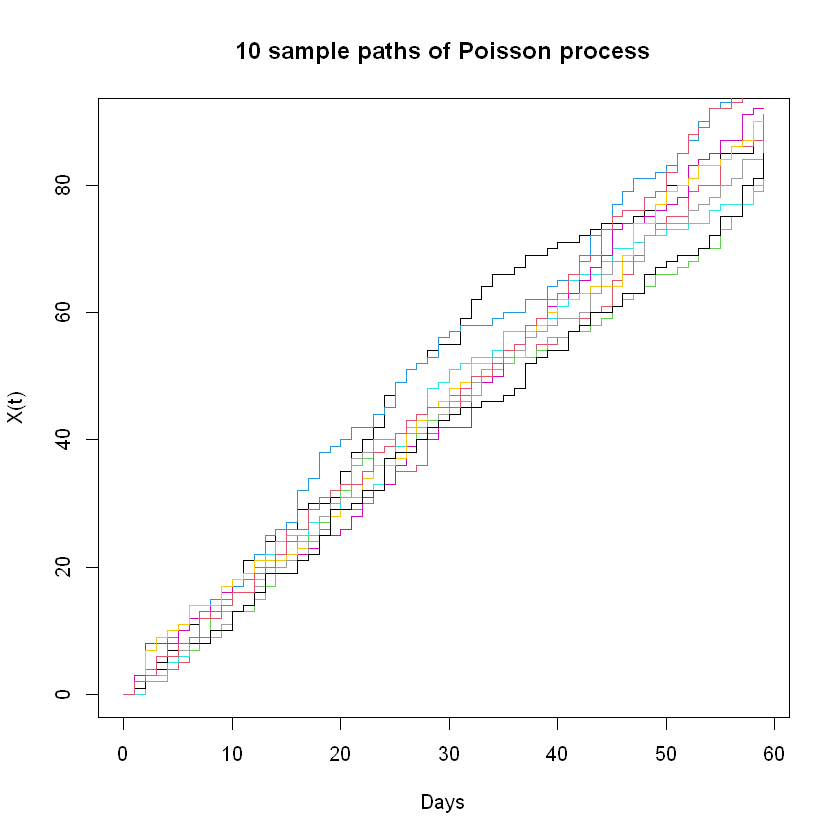

In [5]:
set.seed(123)

lambda <- 1.5
Tmax <- 59
n_paths <- 10

# Simulate paths: Poisson increments day by day
paths <- replicate(n_paths, cumsum(rpois(Tmax, lambda)), simplify = FALSE)

# Plot
plot(0:Tmax, c(0, paths[[1]]), type = "s", col = 1,
     xlab = "Days", ylab = "X(t)",
     main = "10 sample paths of Poisson process")
for (i in 2:n_paths) {
  lines(0:Tmax, c(0, paths[[i]]), type = "s", col = i)
}

### Subproblem 2b

In [7]:
set.seed(123)

lambda <- 1.5   # arrivals per day
gamma  <- 10    # Exp(rate=10) claim sizes (in mill. kr)
Tmax   <- 59
n_sims <- 1000

# --- Monte Carlo estimate of P(Z(59) > 8) ---
Z_T <- numeric(n_sims)
for (i in 1:n_sims) {
  N <- rpois(1, lambda * Tmax)        # number of claims in [0,59]
  if (N == 0) {
    Z_T[i] <- 0
  } else {
    Z_T[i] <- sum(rexp(N, rate = gamma))  # total claim amount
  }
}
p_hat <- mean(Z_T > 8)
se_hat <- sqrt(p_hat * (1 - p_hat) / n_sims)

cat("Estimated P(Z(59) > 8):", round(p_hat, 5), "\n")
cat("Monte Carlo SE:", round(se_hat, 5), "\n")

# --- Ten simple sample paths (daily increments) ---
n_paths <- 10
paths_Z <- vector("list", n_paths)
for (j in 1:n_paths) {
  daily_amounts <- sapply(1:Tmax, function(d) {
    K <- rpois(1, lambda)                 # claims that day
    if (K == 0) 0 else sum(rexp(K, rate = gamma))
  })
  paths_Z[[j]] <- c(0, cumsum(daily_amounts))  # length 60 (0..59)
}

# Save figure for LaTeX
if (!dir.exists("figs")) dir.create("figs", recursive = TRUE)
pdf("figs/z_paths_10.pdf", width = 7, height = 5)
plot(0:Tmax, paths_Z[[1]], type = "s", xlab = "Days", ylab = "Z(t) (mill. kr)",
     main = "10 sample paths of total claim amount Z(t)")
for (j in 2:n_paths) lines(0:Tmax, paths_Z[[j]], type = "s")
grid()
dev.off()


Estimated P(Z(59) > 8): 0.717 
Monte Carlo SE: 0.01424 


pdf 
  2